In [5]:
import pandas as pd
import mysql.connector as sql
from dateutil.relativedelta import relativedelta
#workspace_id = '39'
from_date = '2020-06-01'
to_date = '2021-04-30'
from_date_pre = str(pd.to_datetime(from_date).date() - relativedelta(months=1))
to_date_pre = str(pd.to_datetime(to_date).date() - relativedelta(months=1))
db_connection = sql.connect(host='Company Name-app-production.cw2rtcdyvsry.us-east-1.rds.amazonaws.com', database='Company_prod', user='readonly', password='Company Password')

send_open_df = pd.read_sql("""
SELECT DISTINCT p.id as pitchid, p.headline
from Pitch p
where p.status like 'approved'
""",con=db_connection)


In [6]:
print(send_open_df)
data_pitch = pd.DataFrame({'headline' : send_open_df['headline']})

      pitchid                                           headline
0          10                                              Hello
1          19                                   Hi from Wizikey!
2          24  Introduction- Bertelsmann India Investments (BII)
3          25  Exploring story opportunities for Bertelsmann ...
4          26                                     I feel for you
...       ...                                                ...
4191    16251  Update: DeepRooted.Co supplies fresh farm prod...
4192    16253  Interaction Request: How Aquaconnect Is Buildi...
4193    16256  Response from BlackSoil: Impact on startup eco...
4194    16257         Responses to your story on PE and VC Deals
4195    16258  Responses to your story on startups affected d...

[4196 rows x 2 columns]


In [7]:
data_pitch

,headline
0,Hello
1,Hi from Wizikey!
2,Introduction- Bertelsmann India Investments (BII)
3,Exploring story opportunities for Bertelsmann ...
4,I feel for you
...,...
4191,Update: DeepRooted.Co supplies fresh farm prod...
4192,Interaction Request: How Aquaconnect Is Buildi...
4193,Response from BlackSoil: Impact on startup eco...
4194,Responses to your story on PE and VC Deals


In [8]:
# libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Using TensorFlow backend.


In [9]:
# data load
#f = open('/Users/HP/irish-lyrics-eof.txt', "r")
data=[]
for line in data_pitch['headline']:
    data.append(line)
string_1='\n'.join(map(str, data))

In [10]:
string_1

'Hello\nHi from Wizikey!\nIntroduction- Bertelsmann India Investments (BII)\nExploring story opportunities for Bertelsmann India Investments (BII)\nI feel for you\nEncore\'s Manu Rikhye joins Growx Ventures as a full time partner \nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nHello from VC\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nAnnouncement: GrowX Ventures Appoints Manu Rikhye as Partner\nGadget Portal 91mobiles Acquires Majority Stake in 500 Startups-Funded ‘Pricebaba.com’\nAre startups also struggling with Fake News\n

In [39]:
# tokenizer.word_index.get('')

In [42]:
# text preprocessing, tokenization
tokenizer=Tokenizer()
corpus=string_1.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
input_sequences=[]
for line in corpus:
    token_list=tokenizer.texts_to_sequences([line])[0]
#     print(line, 'dummy',token_list)
    for i in range(1, len(token_list)):
#         print(token_list[i])
        n_gram_sequences=token_list[:i+1]
#         print(token_list[:i+1])
        input_sequences.append(n_gram_sequences)
max_sequences_len=max([len(x) for x in input_sequences])
max_sequences_len, total_words
# print([len(x) for x in input_sequences])''
# input_sequences

(42, 5018)

In [39]:
# tokenizer.word_index['hi']#dict with keys as a word, and values as a vector
# no punctuation present in dict
# tokenizer.word_index['responses']

In [43]:
min_sequences = [x for x in input_sequences if len(x)==2]
min_sequences

[[1669, 15],
 [707, 99],
 [23, 17],
 [1670, 1067],
 [3276, 758],
 [139, 708],
 [139, 708],
 [1962, 15],
 [139, 708],
 [139, 708],
 [139, 708],
 [139, 708],
 [139, 708],
 [139, 708],
 [139, 708],
 [139, 708],
 [3277, 2447],
 [62, 42],
 [2448, 271],
 [20, 374],
 [20, 374],
 [6, 7],
 [1218, 271],
 [1218, 271],
 [1218, 271],
 [836, 22],
 [313, 836],
 [313, 836],
 [313, 836],
 [313, 836],
 [3288, 3],
 [56, 170],
 [3292, 375],
 [28, 108],
 [28, 108],
 [1069, 6],
 [2454, 327],
 [2454, 327],
 [108, 271],
 [108, 271],
 [1069, 3294],
 [1070, 1674],
 [1070, 1674],
 [2459, 1675],
 [2459, 1675],
 [6, 7],
 [1221, 1435],
 [2460, 505],
 [2460, 505],
 [274, 42],
 [274, 42],
 [1221, 1435],
 [1223, 1677],
 [1223, 1677],
 [2, 3297],
 [1436, 5],
 [3302, 3303],
 [328, 534],
 [328, 534],
 [3304, 22],
 [20, 77],
 [20, 77],
 [20, 77],
 [20, 77],
 [437, 120],
 [20, 77],
 [20, 77],
 [1970, 653],
 [1970, 1076],
 [1669, 15],
 [1680, 1077],
 [95, 20],
 [908, 460],
 [506, 157],
 [506, 157],
 [28, 1973],
 [198, 285],

In [44]:
total_words

5018

In [45]:
# padding
input_sequences=np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))

In [46]:
input_sequences

array([[   0,    0,    0, ...,    0, 1669,   15],
       [   0,    0,    0, ..., 1669,   15,   91],
       [   0,    0,    0, ...,    0,  707,   99],
       ...,
       [   0,    0,    0, ..., 5017,  611,    4],
       [   0,    0,    0, ...,  611,    4,  257],
       [   0,    0,    0, ...,    4,  257,  305]])

In [47]:
input_sequences.shape

(48556, 42)

In [52]:
# x & output, one hot encoding
xs=input_sequences[:, :-1]
labels=input_sequences[:, -1]
labels
ys=tf.keras.utils.to_categorical(labels, num_classes=total_words)
ys.shape

(48556, 5018)

In [60]:
labels.shape

(27450,)

In [58]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
labels[0]

18

In [26]:
len(ys[0]),len(ys[1]),len(ys),len(labels)

(3895, 3895, 27450, 27450)

In [48]:
xs.shape,ys.shape

((27450, 41), (27450, 3895))

In [55]:
len(xs), total_words, max_sequences_len

(26986, 3872, 42)

# withou validataion data accuracy is 84%

In [53]:
# model
modelN=Sequential()
modelN.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
modelN.add(Bidirectional(LSTM(350)))
#modelN.add(LSTM(350))
#modelN.add(Dense(350,activation='relu'))
modelN.add(Dense(total_words, activation='softmax'))
adam=Adam(lr=0.01)
modelN.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)
historyN=modelN.fit(xs, ys, epochs=50, verbose=2, batch_size=64, use_multiprocessing=True, callbacks=[checkpoint])

Epoch 1/50


KeyboardInterrupt: 

In [60]:
#save the model
from sklearn.externals import joblib
joblib.dump(modelN, 'modelN.pkl')
print("Model dumped!")
# Load the model that you just saved
modelN = joblib.load('modelN.pkl')

TypeError: can't pickle _thread.RLock objects

In [61]:
historyN.history.keys()

dict_keys(['loss', 'accuracy'])

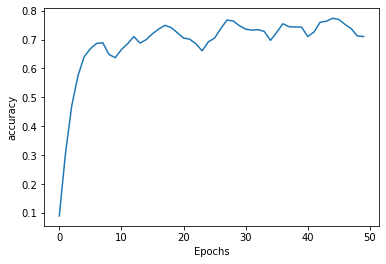

In [62]:
def plot_graph(historyN, string):
    plt.plot(historyN.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()
plot_graph(historyN, 'accuracy')


In [78]:
# seed_text is an example, pass a string into it.
seed_text='LSIP' # pass the string/ words from a given file.
# no of words you wanna a see after seed_text string
next_words=6
for _  in range(next_words):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
    predicted=modelN.predict_classes(token_list, verbose=0)
    output_word='' 
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word=word
            break
    seed_text+=' '+output_word
print(seed_text)

LSIP in the wake of 3 million


# with validation data accuracy is 90%

In [69]:
modelM=Sequential()
modelM.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
modelM.add(Bidirectional(LSTM(50)))
modelM.add(Dense(total_words, activation='softmax'))
xs_train, xs_test, ys_train, ys_test=train_test_split(xs, ys, test_size=0.8)
x_val=xs_train[-100:]
y_val=ys_train[-100:]
adam=Adam(lr=0.01)
modelM.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
historyM=modelM.fit(xs_train, ys_train, validation_data=(x_val, y_val), batch_size=64,epochs=500, verbose=2)

Epoch 1/500
85/85 - 6s - loss: 7.3296 - accuracy: 0.0259 - val_loss: 6.5365 - val_accuracy: 0.0300
Epoch 2/500
85/85 - 5s - loss: 6.3505 - accuracy: 0.0535 - val_loss: 6.0096 - val_accuracy: 0.0600
Epoch 3/500
85/85 - 5s - loss: 5.7350 - accuracy: 0.1045 - val_loss: 5.2746 - val_accuracy: 0.1400
Epoch 4/500
85/85 - 5s - loss: 4.9926 - accuracy: 0.1760 - val_loss: 4.4706 - val_accuracy: 0.2200
Epoch 5/500
85/85 - 5s - loss: 4.2769 - accuracy: 0.2450 - val_loss: 3.8604 - val_accuracy: 0.2800
Epoch 6/500
85/85 - 5s - loss: 3.6152 - accuracy: 0.3289 - val_loss: 3.2236 - val_accuracy: 0.3500
Epoch 7/500
85/85 - 5s - loss: 2.9969 - accuracy: 0.4169 - val_loss: 2.6190 - val_accuracy: 0.4900
Epoch 8/500
85/85 - 5s - loss: 2.4422 - accuracy: 0.5145 - val_loss: 2.0728 - val_accuracy: 0.6200
Epoch 9/500
85/85 - 5s - loss: 1.9942 - accuracy: 0.5979 - val_loss: 1.7146 - val_accuracy: 0.6900
Epoch 10/500
85/85 - 5s - loss: 1.6171 - accuracy: 0.6837 - val_loss: 1.3404 - val_accuracy: 0.7300
Epoch 11/

85/85 - 6s - loss: 0.1697 - accuracy: 0.9424 - val_loss: 0.0855 - val_accuracy: 0.9600
Epoch 84/500
85/85 - 6s - loss: 0.1665 - accuracy: 0.9444 - val_loss: 0.0932 - val_accuracy: 0.9600
Epoch 85/500
85/85 - 6s - loss: 0.1640 - accuracy: 0.9435 - val_loss: 0.1021 - val_accuracy: 0.9600
Epoch 86/500
85/85 - 6s - loss: 0.1627 - accuracy: 0.9418 - val_loss: 0.1080 - val_accuracy: 0.9500
Epoch 87/500
85/85 - 6s - loss: 0.1609 - accuracy: 0.9444 - val_loss: 0.1131 - val_accuracy: 0.9500
Epoch 88/500
85/85 - 6s - loss: 0.1615 - accuracy: 0.9418 - val_loss: 0.0954 - val_accuracy: 0.9600
Epoch 89/500
85/85 - 5s - loss: 0.1613 - accuracy: 0.9420 - val_loss: 0.0930 - val_accuracy: 0.9600
Epoch 90/500
85/85 - 6s - loss: 0.1617 - accuracy: 0.9437 - val_loss: 0.0847 - val_accuracy: 0.9800
Epoch 91/500
85/85 - 5s - loss: 0.1586 - accuracy: 0.9427 - val_loss: 0.0939 - val_accuracy: 0.9500
Epoch 92/500
85/85 - 6s - loss: 0.1586 - accuracy: 0.9448 - val_loss: 0.1179 - val_accuracy: 0.9500
Epoch 93/500


Epoch 165/500
85/85 - 6s - loss: 0.1597 - accuracy: 0.9424 - val_loss: 0.0794 - val_accuracy: 0.9800
Epoch 166/500
85/85 - 6s - loss: 0.1573 - accuracy: 0.9422 - val_loss: 0.0874 - val_accuracy: 0.9600
Epoch 167/500
85/85 - 6s - loss: 0.1584 - accuracy: 0.9424 - val_loss: 0.0904 - val_accuracy: 0.9600
Epoch 168/500
85/85 - 6s - loss: 0.1564 - accuracy: 0.9424 - val_loss: 0.0943 - val_accuracy: 0.9600
Epoch 169/500
85/85 - 5s - loss: 0.1571 - accuracy: 0.9429 - val_loss: 0.0964 - val_accuracy: 0.9600
Epoch 170/500
85/85 - 5s - loss: 0.1582 - accuracy: 0.9420 - val_loss: 0.0862 - val_accuracy: 0.9800
Epoch 171/500
85/85 - 5s - loss: 0.1556 - accuracy: 0.9446 - val_loss: 0.1441 - val_accuracy: 0.9700
Epoch 172/500
85/85 - 5s - loss: 0.1595 - accuracy: 0.9409 - val_loss: 0.0851 - val_accuracy: 0.9700
Epoch 173/500
85/85 - 5s - loss: 0.1590 - accuracy: 0.9429 - val_loss: 0.1017 - val_accuracy: 0.9500
Epoch 174/500
85/85 - 5s - loss: 0.1566 - accuracy: 0.9422 - val_loss: 0.0839 - val_accurac

85/85 - 4s - loss: 0.1592 - accuracy: 0.9433 - val_loss: 0.0864 - val_accuracy: 0.9700
Epoch 247/500
85/85 - 4s - loss: 0.1565 - accuracy: 0.9435 - val_loss: 0.0833 - val_accuracy: 0.9800
Epoch 248/500
85/85 - 4s - loss: 0.1558 - accuracy: 0.9437 - val_loss: 0.0931 - val_accuracy: 0.9500
Epoch 249/500
85/85 - 4s - loss: 0.1549 - accuracy: 0.9429 - val_loss: 0.0800 - val_accuracy: 0.9700
Epoch 250/500
85/85 - 5s - loss: 0.1550 - accuracy: 0.9433 - val_loss: 0.0836 - val_accuracy: 0.9600
Epoch 251/500
85/85 - 5s - loss: 0.1539 - accuracy: 0.9452 - val_loss: 0.0980 - val_accuracy: 0.9500
Epoch 252/500
85/85 - 5s - loss: 0.1556 - accuracy: 0.9431 - val_loss: 0.0831 - val_accuracy: 0.9700
Epoch 253/500
85/85 - 5s - loss: 0.1582 - accuracy: 0.9418 - val_loss: 0.0966 - val_accuracy: 0.9600
Epoch 254/500
85/85 - 5s - loss: 0.1552 - accuracy: 0.9435 - val_loss: 0.0813 - val_accuracy: 0.9700
Epoch 255/500
85/85 - 5s - loss: 0.1541 - accuracy: 0.9442 - val_loss: 0.0761 - val_accuracy: 0.9700
Epoc

Epoch 328/500
85/85 - 6s - loss: 0.1785 - accuracy: 0.9405 - val_loss: 0.1042 - val_accuracy: 0.9600
Epoch 329/500
85/85 - 6s - loss: 0.1707 - accuracy: 0.9426 - val_loss: 0.1010 - val_accuracy: 0.9700
Epoch 330/500
85/85 - 6s - loss: 0.1648 - accuracy: 0.9418 - val_loss: 0.0987 - val_accuracy: 0.9600
Epoch 331/500
85/85 - 7s - loss: 0.1619 - accuracy: 0.9416 - val_loss: 0.0837 - val_accuracy: 0.9800
Epoch 332/500
85/85 - 6s - loss: 0.1604 - accuracy: 0.9444 - val_loss: 0.0970 - val_accuracy: 0.9700
Epoch 333/500
85/85 - 5s - loss: 0.1589 - accuracy: 0.9424 - val_loss: 0.1078 - val_accuracy: 0.9600
Epoch 334/500
85/85 - 6s - loss: 0.1568 - accuracy: 0.9442 - val_loss: 0.0848 - val_accuracy: 0.9700
Epoch 335/500
85/85 - 5s - loss: 0.1571 - accuracy: 0.9416 - val_loss: 0.0928 - val_accuracy: 0.9600
Epoch 336/500
85/85 - 5s - loss: 0.1566 - accuracy: 0.9431 - val_loss: 0.0908 - val_accuracy: 0.9600
Epoch 337/500
85/85 - 5s - loss: 0.1591 - accuracy: 0.9427 - val_loss: 0.0862 - val_accurac

85/85 - 7s - loss: 0.2143 - accuracy: 0.9281 - val_loss: 0.1409 - val_accuracy: 0.9300
Epoch 410/500
85/85 - 7s - loss: 0.1892 - accuracy: 0.9370 - val_loss: 0.1184 - val_accuracy: 0.9500
Epoch 411/500
85/85 - 7s - loss: 0.1848 - accuracy: 0.9379 - val_loss: 0.1062 - val_accuracy: 0.9600
Epoch 412/500
85/85 - 7s - loss: 0.1760 - accuracy: 0.9418 - val_loss: 0.0995 - val_accuracy: 0.9700
Epoch 413/500
85/85 - 7s - loss: 0.1690 - accuracy: 0.9409 - val_loss: 0.1000 - val_accuracy: 0.9700
Epoch 414/500
85/85 - 7s - loss: 0.1664 - accuracy: 0.9444 - val_loss: 0.1003 - val_accuracy: 0.9800
Epoch 415/500
85/85 - 7s - loss: 0.1619 - accuracy: 0.9390 - val_loss: 0.0965 - val_accuracy: 0.9600
Epoch 416/500
85/85 - 7s - loss: 0.1611 - accuracy: 0.9435 - val_loss: 0.0867 - val_accuracy: 0.9600
Epoch 417/500
85/85 - 7s - loss: 0.1605 - accuracy: 0.9431 - val_loss: 0.0888 - val_accuracy: 0.9700
Epoch 418/500
85/85 - 7s - loss: 0.1590 - accuracy: 0.9455 - val_loss: 0.0911 - val_accuracy: 0.9600
Epoc

Epoch 491/500
85/85 - 5s - loss: 0.1741 - accuracy: 0.9398 - val_loss: 0.0901 - val_accuracy: 0.9800
Epoch 492/500
85/85 - 5s - loss: 0.1689 - accuracy: 0.9405 - val_loss: 0.0876 - val_accuracy: 0.9800
Epoch 493/500
85/85 - 5s - loss: 0.1628 - accuracy: 0.9418 - val_loss: 0.0886 - val_accuracy: 0.9700
Epoch 494/500
85/85 - 5s - loss: 0.1598 - accuracy: 0.9431 - val_loss: 0.1036 - val_accuracy: 0.9400
Epoch 495/500
85/85 - 7s - loss: 0.1583 - accuracy: 0.9427 - val_loss: 0.0930 - val_accuracy: 0.9600
Epoch 496/500
85/85 - 6s - loss: 0.1596 - accuracy: 0.9429 - val_loss: 0.1230 - val_accuracy: 0.9400
Epoch 497/500
85/85 - 7s - loss: 0.1579 - accuracy: 0.9437 - val_loss: 0.1109 - val_accuracy: 0.9500
Epoch 498/500
85/85 - 7s - loss: 0.1579 - accuracy: 0.9418 - val_loss: 0.1038 - val_accuracy: 0.9500
Epoch 499/500
85/85 - 7s - loss: 0.1577 - accuracy: 0.9418 - val_loss: 0.0972 - val_accuracy: 0.9600
Epoch 500/500
85/85 - 7s - loss: 0.1552 - accuracy: 0.9439 - val_loss: 0.0987 - val_accurac

In [81]:
#save the model
from sklearn.externals import joblib
joblib.dump(modelM, 'modelM1.pkl')
print("Model dumped!")
# Load the model that you just saved
modelM = joblib.load('modelM1.pkl')

TypeError: can't pickle _thread.RLock objects

In [79]:
# seed_text is an example, pass a string into it.
seed_text='LSIP' # pass the string/ words from a given file.
# no of words you wanna a see after seed_text string
next_words=6
for _  in range(next_words):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
    predicted=modelM.predict_classes(token_list, verbose=0)
    output_word='' 
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word=word
            break
    seed_text+=' '+output_word
print(seed_text)

LSIP based consumer acceptance interaction usertesting solutions


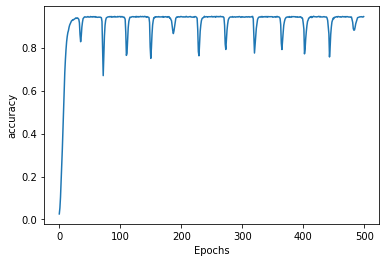

In [76]:
def plot_graph(historyM, string):
    plt.plot(historyM.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.show()
plot_graph(historyM, 'accuracy')

In [ ]:
def create_model(optimizer='rmsprop'):
    modelO=Sequential()
    modelO.add(Embedding(total_words, 100, input_length=max_sequences_len-1))
    modelO.add(Bidirectional(LSTM(350)))
    modelO.add(Dense(total_words, activation='softmax'))
    adam=Adam(lr=0.01)
    modelO.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    #model3.fit(xs, ys, epochs=5, verbose=1, batch_size=64)
    return modelO
#start= time()
modelP = KerasClassifier(build_fn=create_model,verbose=1)
n_iter_search = 16 # Number of parameter settings that are sampled.
optimizers = ['rmsprop', 'adam']
#init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([100, 200, 300, 400, 500])
batches = np.array([64, 32, 128])
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches)#, init=init

random_search = RandomizedSearchCV(estimator=modelP, 
                                   param_distributions=param_grid,
                                   n_iter=n_iter_search, n_jobs=1)
random_search.fit(xs, ys)
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
#print("total time:",time()-start)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

226/338 [===================>..........] - ETA: 1:27 - loss: 7.0123 - accuracy: 0.0539

In [ ]:
# seed_text is an example, pass a string into it.
seed_text='LSIP' # pass the string/ words from a given file.
# no of words you wanna a see after seed_text string
next_words=6
for _  in range(next_words):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list], maxlen=max_sequences_len-1, padding='pre')
    predicted=random_search.predict_classes(token_list, verbose=0)
    output_word='' 
    for word, index in tokenizer.word_index.items():
        if index==predicted:
            output_word=word
            break
    seed_text+=' '+output_word
print(seed_text)

In [ ]:
# glove embeddings
